In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

In [2]:
netflix_df = pd.read_csv("Resources/netflix.csv")
netflix_df = netflix_df.set_index('Title')
netflix_df.head()

,Year,Age,IMDB,Rotten Tomatoes
Title,,,,
Breaking Bad,2008,18+,9.5,96%
Stranger Things,2016,16+,8.8,93%
Money Heist,2017,18+,8.4,91%
Sherlock,2010,16+,9.1,78%
Better Call Saul,2015,18+,8.7,97%


In [3]:
imdb_average = netflix_df['IMDB'].mean()
imdb_average

7.163279955825518

In [4]:
netflix_df_dropped = netflix_df.dropna()
netflix_df_dropped.head()

,Year,Age,IMDB,Rotten Tomatoes
Title,,,,
Breaking Bad,2008,18+,9.5,96%
Stranger Things,2016,16+,8.8,93%
Money Heist,2017,18+,8.4,91%
Sherlock,2010,16+,9.1,78%
Better Call Saul,2015,18+,8.7,97%


In [5]:
netflix_df_dropped['RT'] = netflix_df_dropped['Rotten Tomatoes'].str.extract('(\d+)').astype(int)
netflix_df_dropped.head()

<ipython-input-5-b3c0160c5f61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df_dropped['RT'] = netflix_df_dropped['Rotten Tomatoes'].str.extract('(\d+)').astype(int)


,Year,Age,IMDB,Rotten Tomatoes,RT
Title,,,,,
Breaking Bad,2008,18+,9.5,96%,96
Stranger Things,2016,16+,8.8,93%,93
Money Heist,2017,18+,8.4,91%,91
Sherlock,2010,16+,9.1,78%,78
Better Call Saul,2015,18+,8.7,97%,97


In [6]:
rotten_average = netflix_df_dropped['RT'].mean()
age_group = netflix_df['Age'].mode()
total_shows = len(netflix_df)
title = netflix_df.index.to_list()

In [7]:
netflix_df.sort_values(by=['IMDB'], inplace=True, ascending=False)
highest_rated_imdb = netflix_df.index[0]

In [8]:
netflix_df_dropped.sort_values(by=['RT', 'IMDB'], inplace=True, ascending=False)
netflix_df_dropped.head(100)
highest_rated_rt = netflix_df_dropped.index[0]
highest_rated_rt

<ipython-input-8-717219f67f22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df_dropped.sort_values(by=['RT', 'IMDB'], inplace=True, ascending=False)


'Avatar: The Last Airbender'

In [9]:
netflix = pd.DataFrame({'Total Number of Shows': total_shows,
                        'Most Popular Age Group': age_group,
                        'Highest Rated IMDB': highest_rated_imdb,
                        'IMDB Average': imdb_average,
                        'Highest Rated RT': highest_rated_rt,
                        'Rotten Tomatoes': rotten_average})
netflix

,Total Number of Shows,Most Popular Age Group,Highest Rated IMDB,IMDB Average,Highest Rated RT,Rotten Tomatoes
0,1931,16+,Breaking Bad,7.16328,Avatar: The Last Airbender,78.322115


In [10]:
netflix_df = netflix_df.reset_index()
bins = [1900, 1949, 1979, 1989, 1999, 2009, 2020]
groups = ['1900-1949', '1950-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2020']
pd.cut(netflix_df['Year'], bins, labels=groups)

0       2000-2009
1       1980-1989
2       2010-2020
3       2010-2020
4       2000-2009
          ...    
1926    2010-2020
1927    2010-2020
1928    2010-2020
1929    2010-2020
1930    2010-2020
Name: Year, Length: 1931, dtype: category
Categories (6, object): [1900-1949 < 1950-1979 < 1980-1989 < 1990-1999 < 2000-2009 < 2010-2020]

In [11]:
netflix_df['Age Range'] = pd.cut(netflix_df['Year'], bins, labels=groups)
netflix_df.head()

,Title,Year,Age,IMDB,Rotten Tomatoes,Age Range
0,Breaking Bad,2008,18+,9.5,96%,2000-2009
1,Ramayan,1987,all,9.3,NaN,1980-1989
2,Our Planet,2019,7+,9.3,93%,2010-2020
3,Yeh Meri Family,2018,NaN,9.2,NaN,2010-2020
4,Avatar: The Last Airbender,2005,7+,9.2,100%,2000-2009


In [12]:
age_range_df = netflix_df.groupby("Age Range")
age_range_df.head(50)

,Title,Year,Age,IMDB,Rotten Tomatoes,Age Range
0,Breaking Bad,2008,18+,9.5,96%,2000-2009
1,Ramayan,1987,all,9.3,NaN,1980-1989
2,Our Planet,2019,7+,9.3,93%,2010-2020
3,Yeh Meri Family,2018,NaN,9.2,NaN,2010-2020
4,Avatar: The Last Airbender,2005,7+,9.2,100%,2000-2009
...,...,...,...,...,...,...
1749,House Doctor,1998,NaN,4.8,NaN,1990-1999
1769,Black Crows,1983,NaN,4.4,NaN,1980-1989
1771,Ninja Turtles: The Next Mutation,1997,7+,4.4,NaN,1990-1999
1857,Born To Explore,1914,NaN,NaN,NaN,1900-1949


In [13]:
ranges = age_range_df["Age Range"].count()
ranges

Age Range
1900-1949       1
1950-1979      10
1980-1989      18
1990-1999      35
2000-2009     181
2010-2020    1686
Name: Age Range, dtype: int64

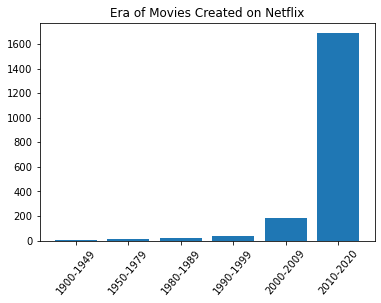

In [14]:
plt.bar(groups, ranges);
plt.title('Era of Movies Created on Netflix');
plt.xticks(rotation=50);

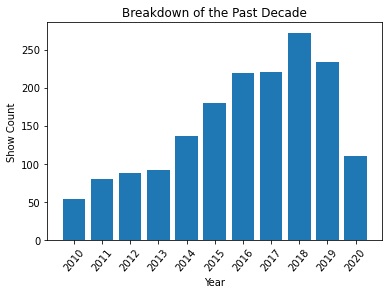

In [15]:
netflix_years = netflix_df.groupby("Year")
netflix_year_count = netflix_years.count().tail(11)
top_11_years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
plt.bar(top_11_years,netflix_year_count['Title'])
plt.title('Breakdown of the Past Decade')
plt.xlabel('Year')
plt.ylabel('Show Count')
plt.xticks(rotation=50);

1811

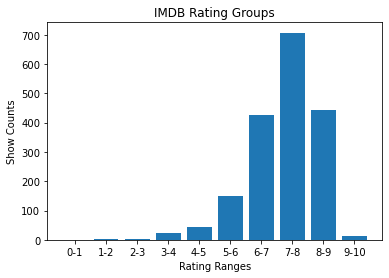

In [16]:
# IMDB Rating Groups using bins
bins2 = [0, .99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99, 7.99, 8.99, 10]
groups2 = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10']
# ranges2['Title']
netflix_df['IMDB Rating Ranges'] = pd.cut(netflix_df['IMDB'], bins2, labels=groups2)
imdb_rating_ranges = netflix_df.groupby('IMDB Rating Ranges')
ranges2 = imdb_rating_ranges['IMDB Rating Ranges'].count()
plt.bar(groups2, ranges2);
plt.title('IMDB Rating Groups')
plt.xlabel('Rating Ranges')
plt.ylabel('Show Counts')
ranges2.sum()

416

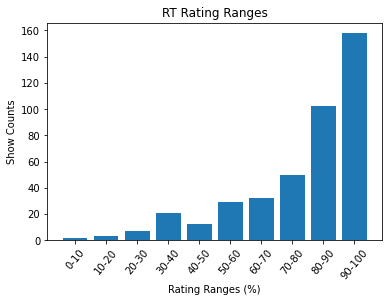

In [17]:
# Rotten Tomatoes Rating Groups using bins
bins3 = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 100]
groups3 = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
netflix_df_dropped['RT Rating Ranges'] = pd.cut(netflix_df_dropped['RT'], bins3, labels=groups3)
rt_rating_ranges = netflix_df_dropped.groupby('RT Rating Ranges')
ranges3 = rt_rating_ranges['RT Rating Ranges'].count()
plt.bar(groups3, ranges3);
plt.title('RT Rating Ranges')
plt.xlabel('Rating Ranges (%)')
plt.ylabel('Show Counts')
plt.xticks(rotation=50);
ranges3.sum()

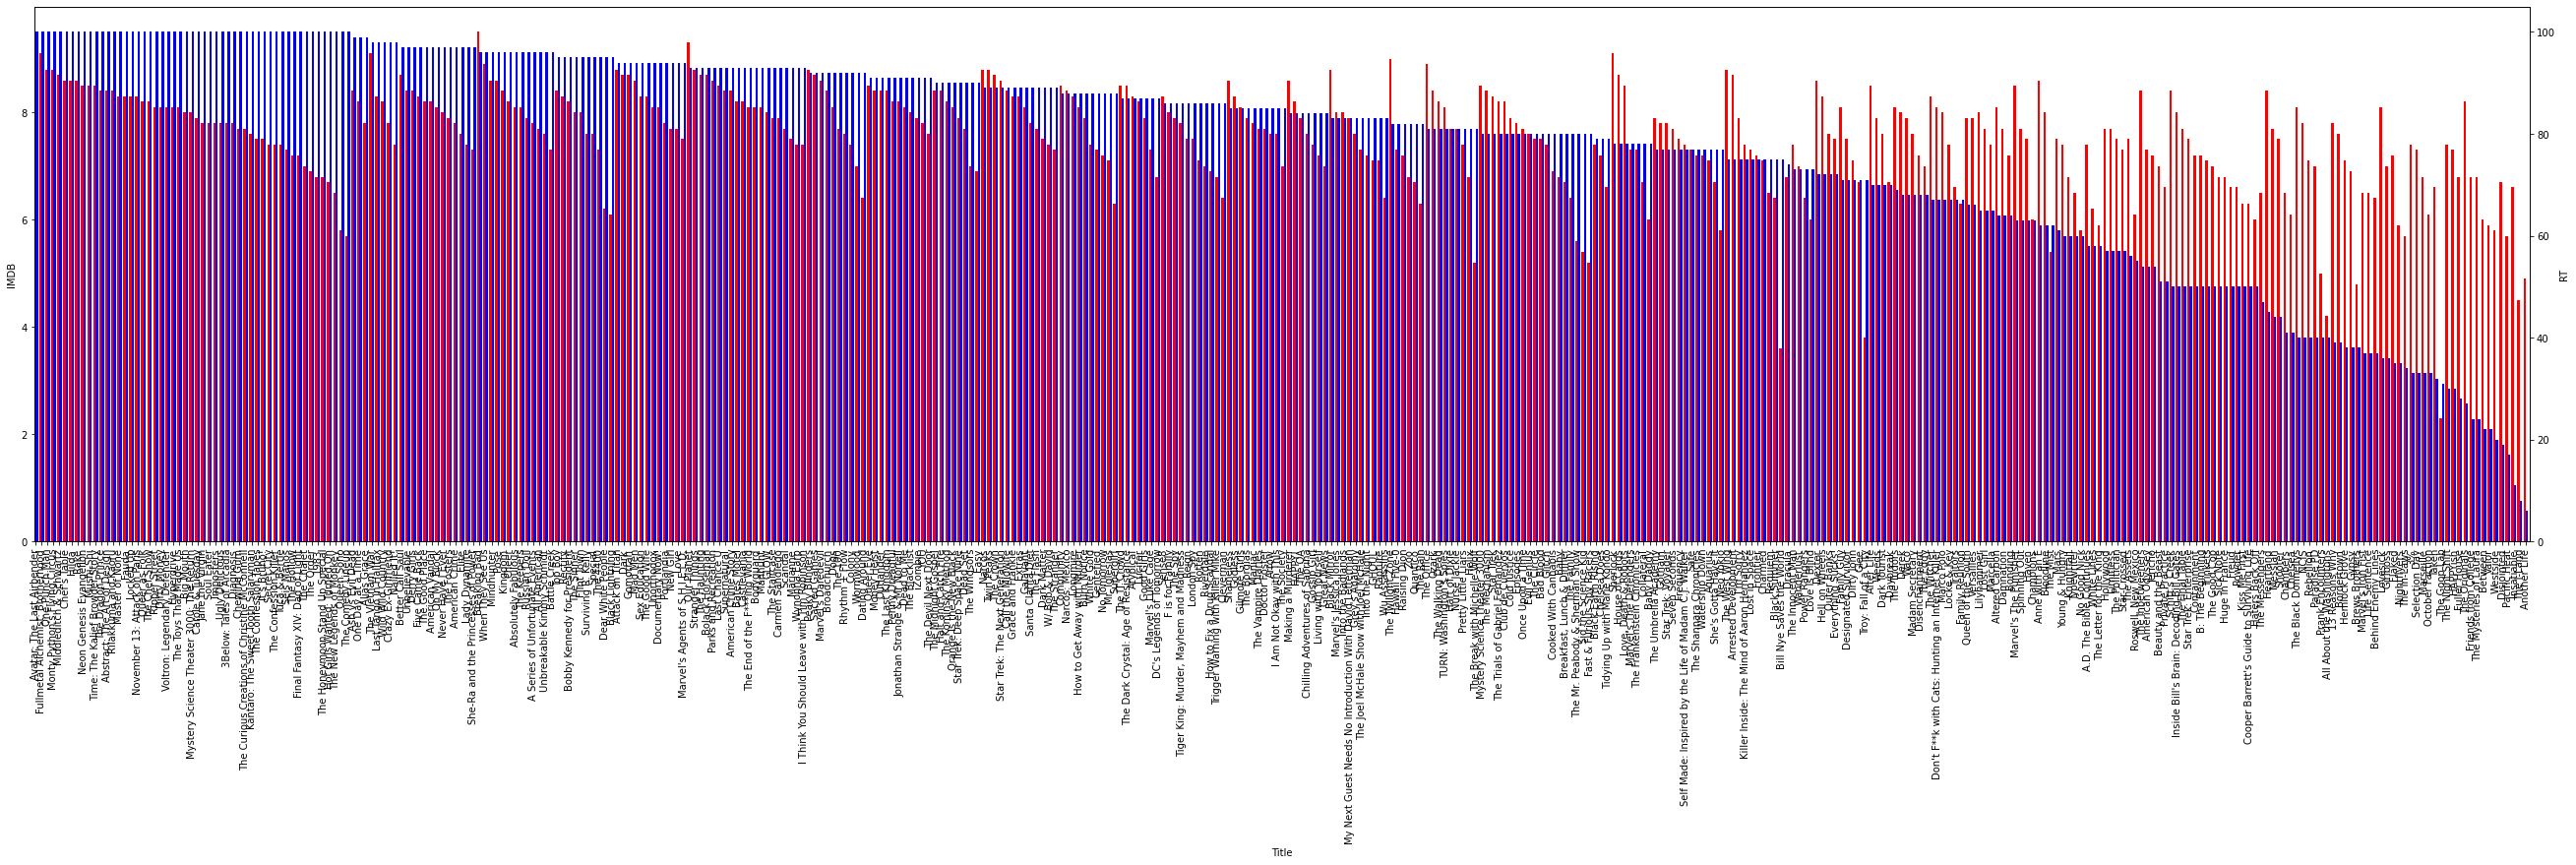

In [25]:
# Compares each show's IMDB and Rotten Tomatoes' rating
fig = plt.figure(figsize=(100,10)) # Create matplotlib figure
ax = fig.add_subplot(121) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4
netflix_df_dropped.IMDB.plot(kind='bar', color='red', ax=ax, width=width, position=1);
netflix_df_dropped.RT.plot(kind='bar', color='blue', ax=ax2, width=width, position=0);
ax.set_ylabel('IMDB');
ax2.set_ylabel('RT');


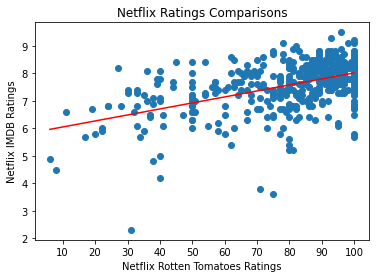

The correlation between both factors is 0.49


In [23]:
# Netflix Ratings Comparisons for shows with both ratings
netflix_RT = netflix_df_dropped['RT']
netflix_IMBD_ratings = netflix_df_dropped['IMDB']



x_values = netflix_RT
y_values = netflix_IMBD_ratings
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.annotate(line_eq, (20,36), fontsize=15, color="red")
plt.annotate(line_eq ,(6,10),fontsize=15,color="green")



plt.scatter(netflix_RT,netflix_IMBD_ratings)
plt.plot(x_values,regress_values,"r-")
plt.title('Netflix Ratings Comparisons')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('Netflix Rotten Tomatoes Ratings')
plt.ylabel('Netflix IMDB Ratings')
plt.xlim = (0,100)
plt.show()

correlation = st.pearsonr(netflix_RT,netflix_IMBD_ratings)
print(f"The correlation between both factors is {round(correlation[0],2)}")

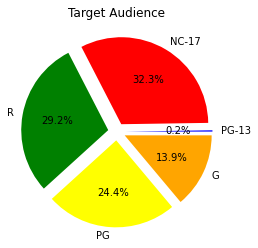

In [24]:
#Netflix Target Audience pie chart
netflix_age_group = netflix_df.groupby("Age")
age_count = netflix_age_group.count()
explode = (0.1,.1,0.1,0.1,0.1)
labels = ['PG-13','NC-17','R','PG','G']

plt.pie(age_count['Title'],explode = explode, labels = labels, colors = ['blue','red','green','yellow','orange'],autopct="%1.1f%%");
plt.title('Target Audience');